# Módulo 5 - Técnicas de Programação II
## Aula 6
- Continuação de Gráficos com Seaborn
- Exercícios
- EDA

## Exploratory Data Analysis (EDA)

### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

%matplotlib inline

### Dataframe

About this dataset  
- age : Age of the patient  
- sex : Sex of the patient
- exng: exercise induced angina (1 = yes; 0 = no)
- caa: number of major vessels (0-3)
- cp : Chest Pain type chest pain type  
  Value 1: typical angina  
  Value 2: atypical angina  
  Value 3: non-anginal pain  
  Value 4: asymptomatic  
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results  
  Value 0: normal  
  Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
  Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
- thalachh : maximum heart rate achieved
- thall : thall rate
- oldpeak: previous peak
- slp: slope
- output : 0 = less chance of heart attack 1= more chance of heart attack

In [2]:
df_heart = pd.read_csv('.\data\heart.csv')
df_heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Informações do DatraFrame**

In [3]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Describe do DataFrame**

In [4]:
df_heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df_heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

**Separação de Variáveis**

In [6]:
target = 'output'
vars_categ = ['sex', 'exng', 'cp', 'caa', 'fbs', 'restecg', 'slp', 'thall']
vars_cont = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

**Missing values**

In [7]:
df_heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

### Análise Univariada
Variável target

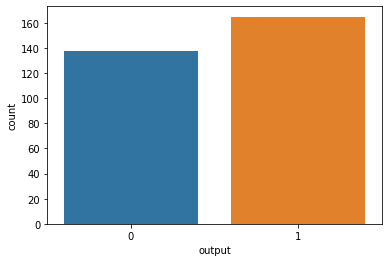

In [8]:
sns.countplot(data=df_heart, x=target);

Varáveis Contínuas

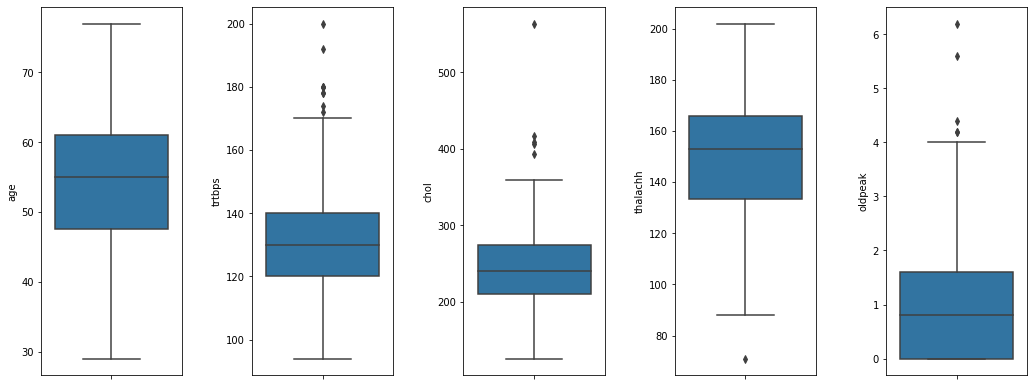

In [9]:
fig, ax = plt.subplots(1, 5, figsize=(15, 6))

cont=0
for j in range(5):
    sns.boxplot(data=df_heart, y=vars_cont[cont], ax=ax[j]);
    cont = cont + 1

fig.tight_layout(pad=3.0)

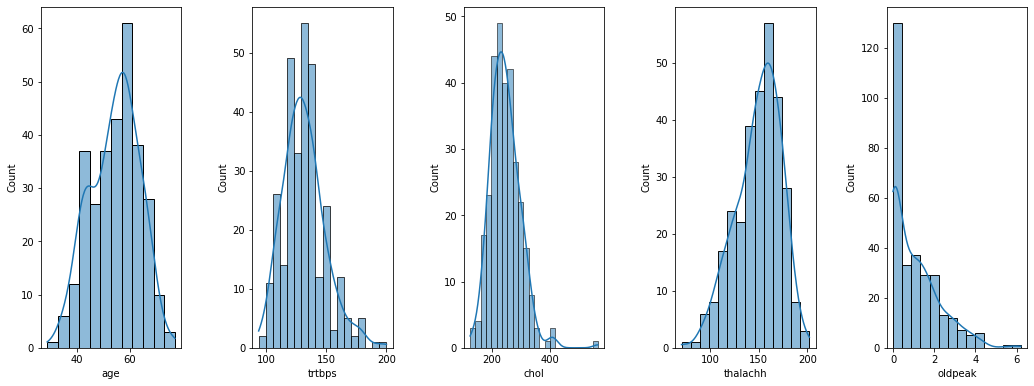

In [10]:
fig, ax = plt.subplots(1, 5, figsize=(15, 6))

cont=0
for j in range(5):
    sns.histplot(data=df_heart, x=vars_cont[cont], ax=ax[j], kde=True);
    cont = cont + 1

fig.tight_layout(pad=3.0)

Variáveis categóricas

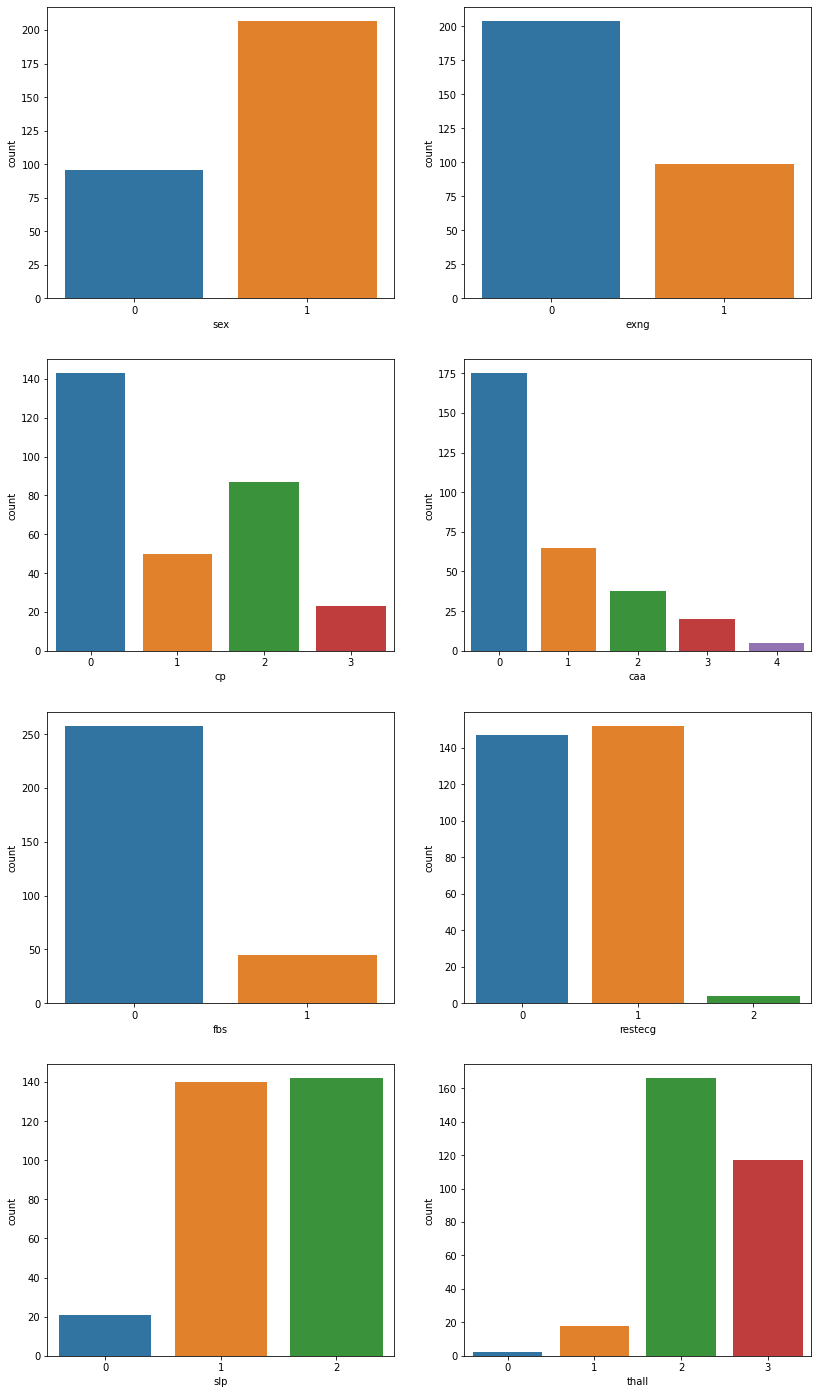

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(12, 20))

cont = 0
for i in range(4):
    for j in range(2):
        sns.countplot(data=df_heart, x=vars_categ[cont], ax=ax[i][j])
        cont = cont + 1
        
fig.tight_layout(pad=3.0)

### Análise Multivariada

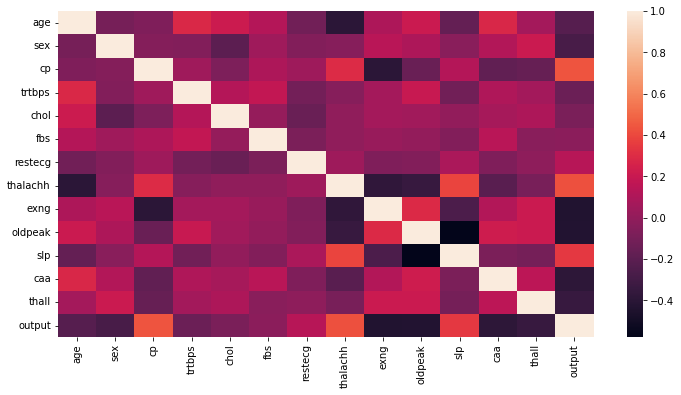

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_heart.corr());

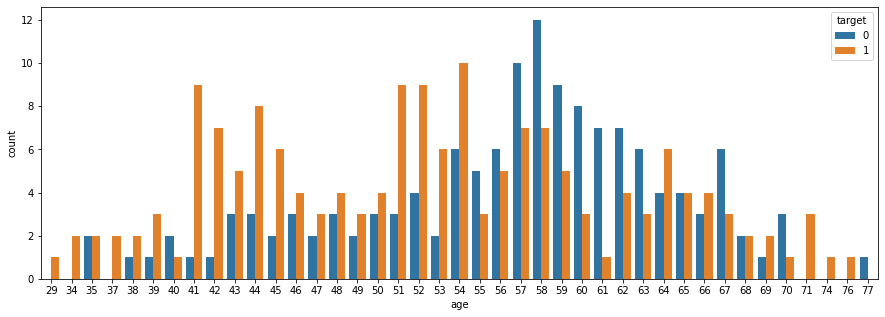

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(x=df_heart['age'], hue=df_heart['output'])

plt.legend(loc='upper right', title='target')
plt.show()

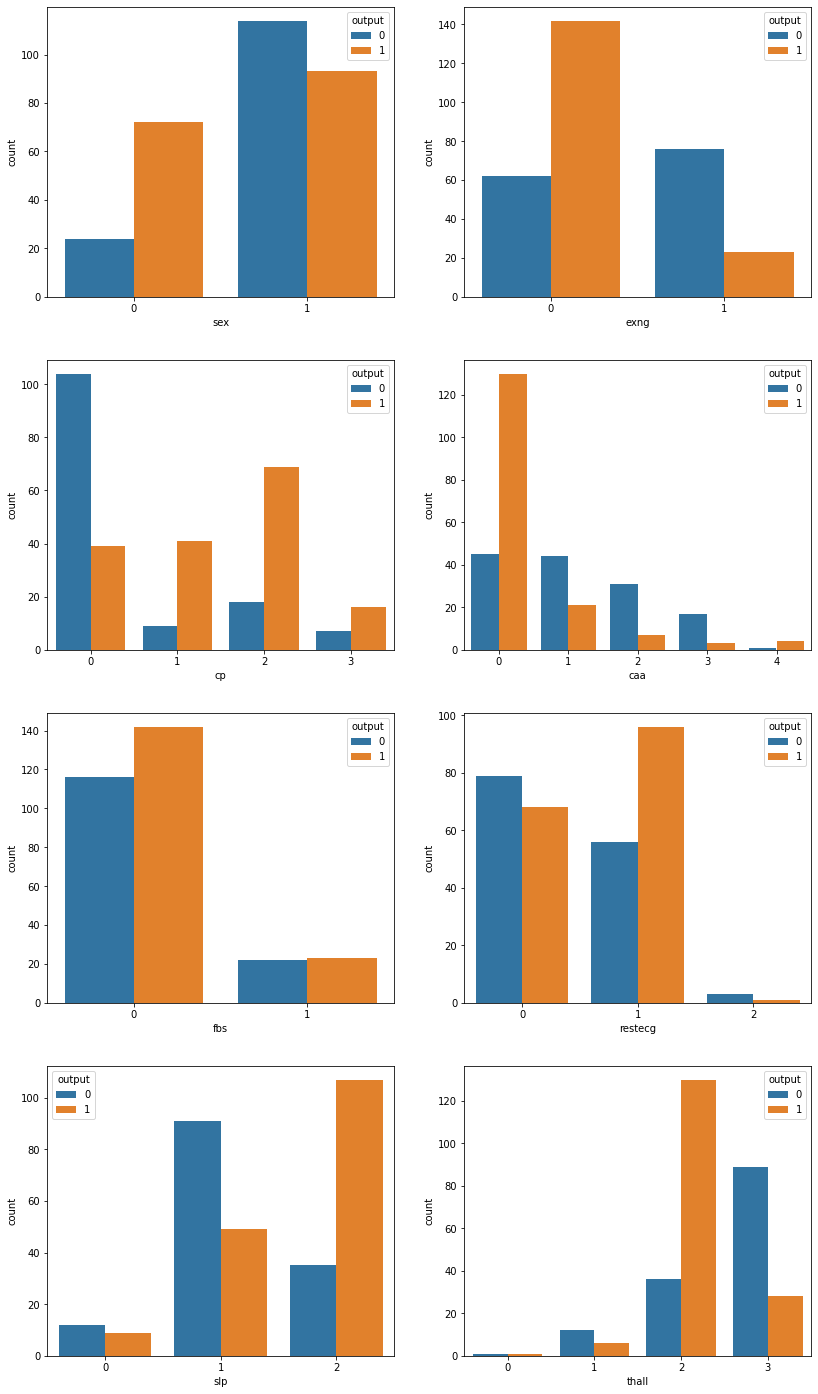

In [14]:
fig, ax = plt.subplots(4, 2, figsize=(12, 20))

cont = 0
for i in range(4):
    for j in range(2):
        sns.countplot(data=df_heart, x=vars_categ[cont], hue='output', ax=ax[i][j])
        cont = cont + 1
        
fig.tight_layout(pad=3.0)

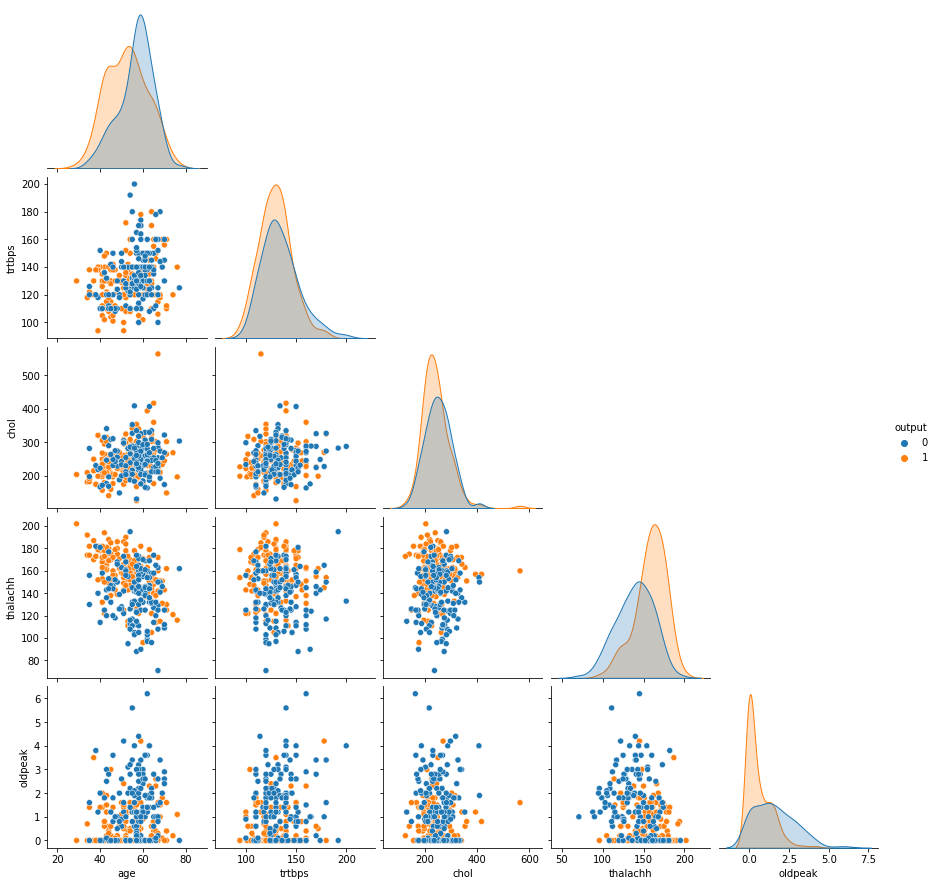

In [15]:
vars_cont.append(target)
sns.pairplot(data=df_heart[vars_cont], hue='output', corner=True);

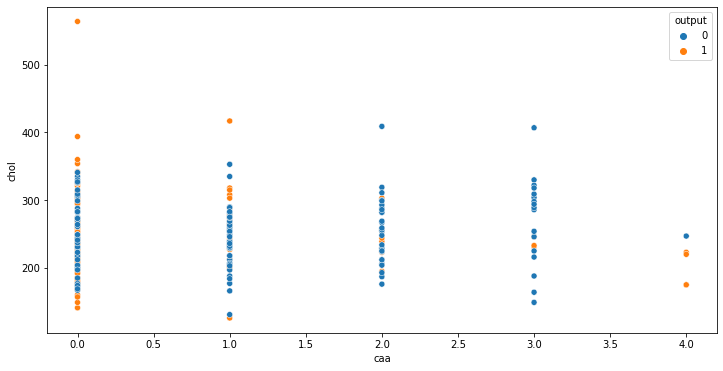

In [16]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='caa', y='chol', hue='output', data=df_heart);